# Haunted Places
'haunted_places.csv' source: https://www.kaggle.com/datasets/sujaykapadnis/haunted-places

# 1. About Us, About the Data, Define Objectives/Questions
### Scenario/About Us:

### About the Data: 
- Our client is doing research on the best cities to consider. We are supplied with their own preliminary research, a list of the top 17 most haunted cities. To supplement this, the organization has also supplied us with a dataset they originated from 'theshadowlands.net', which hosts first-hand accounts of paranormal experiences. The  dataset consists of approximately 10,000 first-hand accounts of paranormal experiences, each characterizing a different "haunted place".  

### Objectives: 

### Questions:  
1. Which cities appear to have the highest presence of "haunted" locations?   
2. Which of these cities are best, from a tourism perspective?   
3. (optional) Can we categorize the sentiment ("fear factor") of the descriptions of these haunted locations? Is it possible that some locations arae more "tourist-friendly" than others?   
3. (optional) Can we categorize these locations by their type?   
4. (optional) Can we overlay locations of historical significance to see if there is any overlap? If so, maybe we can factor that into our city recommendations.   

### Running ideas:
- Possibly use a "tourism by city" dataset to supplement this.  
- Yelp/TripAdvisor reviews?    

- possible questions?:
1. What are top cities for paranormal activity?  
2. What are the top cities for overall travel/tourism within the US?  
3. Can a few cities be chosen so we can come up with proposals of haunted tours in these places?  

# Data Acquisition
preview of `haunted_places.csv`:

In [23]:
import pandas as pd
haunted_places = pd.read_csv('haunted_places.csv')
haunted_places.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


preview of `spooky.csv`:  
*> Note: this dataset is already clean and needs no further alteration. It will just be used for exploration and beyond.*  
*So the following procedures are mostly for `haunted_places`, unless otherwise specified.*  

In [24]:
spooky = pd.read_csv('spooky.csv')
spooky

,City,State,Location,Longitude,Latitude
0,Delray Beach,Florida,The Blue Anchor,-80.105545,26.459761
1,Philadelphia,Pennslyvania,Eastern State Penitentiary,-75.165222,39.952583
2,Deadwood,South Dakota,The Historic Bullock Hotel,-103.729600,44.376700
3,Bethlehem,Pennslyvania,Historic Hotel Bethlehem,-75.370500,40.625900
4,Bedford,Pennslyvania,Jean Bonnet Tavern,-78.503907,40.018692
5,Savannah,Georgia,Kehoe House,-81.088371,32.076176
6,Vicksburg,Mississippi,McRaven,-90.891266,32.363724
7,St. Francisville,Louisiana,The Myrtles Plantation,-91.376846,30.788073
8,Washington,District of Colombia,Omni Shoreham Hotel,-77.009056,38.889805
9,Savannah,Georgia,Sorrel-Weed House,-81.088400,32.076000


to make graphing easier, we'll add a new column to `spooky` with extra spaces removed  

In [25]:
# create a new column in `spooky` for the abbreviations of states for easier plotting
spooky['state_no_spaces'] = ['Florida', 'Pennsylvania', 'South Dakota', 'Pennsylvania', 'Pennsylvania', 'Georgia', 'Mississippi', 'Louisiana', 'Pennsylvania', 'Georgia', 'Colorodo', 'West Virginia', 'West Virginia', 'Louisiana', 'Oregon', 'California', 'Massachusetts']

In [26]:
# check the new column
spooky

,City,State,Location,Longitude,Latitude,state_no_spaces
0,Delray Beach,Florida,The Blue Anchor,-80.105545,26.459761,Florida
1,Philadelphia,Pennslyvania,Eastern State Penitentiary,-75.165222,39.952583,Pennsylvania
2,Deadwood,South Dakota,The Historic Bullock Hotel,-103.729600,44.376700,South Dakota
3,Bethlehem,Pennslyvania,Historic Hotel Bethlehem,-75.370500,40.625900,Pennsylvania
4,Bedford,Pennslyvania,Jean Bonnet Tavern,-78.503907,40.018692,Pennsylvania
5,Savannah,Georgia,Kehoe House,-81.088371,32.076176,Georgia
6,Vicksburg,Mississippi,McRaven,-90.891266,32.363724,Mississippi
7,St. Francisville,Louisiana,The Myrtles Plantation,-91.376846,30.788073,Louisiana
8,Washington,District of Colombia,Omni Shoreham Hotel,-77.009056,38.889805,Pennsylvania
9,Savannah,Georgia,Sorrel-Weed House,-81.088400,32.076000,Georgia


Below, i cross checked `haunted_places` with `spoooky` to see the locations they share and don't share.  

These three cities are missing from `haunted_places`:  
1. Delray Beach
2. Vicksburg
#. Moundsville, WV

The rest are present and many specific locations are present too.  

In [27]:
# Delray Beach
# vicksburg
# Moundsville, WV

haunted_places.query("city == 'Fall River'  & state_abbrev == 'MA'")

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
1479,Fall River,United States,This is the house where Lizzie Borden lived an...,92 Second St. Fall River/ Bed &amp; Breakfast,Massachusetts,MA,-71.156196,41.698928,-71.155045,41.701491
1480,Fall River,United States,"Mysterious noises, Mysterious blurs in photos....",Aldea,Massachusetts,MA,-71.112426,41.736713,-71.155045,41.701491
1481,Fall River,United States,Witnesses report seeing lights in the cemetery...,Oak Grove Cemetery,Massachusetts,MA,-71.136796,41.706377,-71.155045,41.701491


In [28]:
haunted_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


variables:  
`city`: the city where the place is located.  
`country`: the country where the place is located (always "United States")  
`description`: A text description of the place. The amount of detail in these descriptions is highly variable.  
`location`: A title for the haunted place.  
`state`: The US state where the place is located.  
`state_abbrev`: the two-letter abbreviation for the state.  
`longitude`: Longitude of the place.  
`latitude`: Latitude of the place.  
`city_longitude`: Longitude of the city center.  
`city_latitude`: Latitude of the city center.  

# Initial Data Exploration
(for `haunted_places`)
1. **check dataset shape**  
2. **check data types**  
3. **obtain basic statistics for quantitative/numeric columns**
4. **check out the unique number and type for categorical columns (where reasonable)**  

In [29]:
# Get the size of the dataset
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(haunted_places.shape[1]) + " columns and " + str(haunted_places.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 10 columns and 10992 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [30]:
# Display data types
haunted_places.dtypes

city               object
country            object
description        object
location           object
state              object
state_abbrev       object
longitude         float64
latitude          float64
city_longitude    float64
city_latitude     float64
dtype: object

In [31]:
# Display descriptive statistics for numerical columns
haunted_places.describe()

,longitude,latitude,city_longitude,city_latitude
count,9731.000000,9731.000000,10963.000000,10963.000000
mean,-91.996655,38.342790,-91.909268,38.376575
std,17.686038,5.259289,16.401246,5.067072
min,-164.722410,-45.023726,-164.723889,19.575619
25%,-99.119403,34.676030,-98.493387,34.737780
50%,-87.231215,39.279584,-87.090277,39.283397
75%,-80.303764,41.873400,-80.505896,41.847006
max,168.697269,66.892589,-67.840232,66.898333


In [32]:
# Display the number of uniques for each categorical column, where it makes sense
print("There are " + str(haunted_places['city'].nunique()) + " cities in `city`. ")
print("There are " + str(haunted_places['country'].nunique()) + " countries in `country`. ")
print("There are " + str(haunted_places['state'].nunique()) + " states in `state`. ")
print("There are " + str(haunted_places['state_abbrev'].nunique()) + " state abbreviations in `state_abbrev`. ")

There are 4385 cities in `city`. 
There are 1 countries in `country`. 
There are 51 states in `state`. 
There are 51 state abbreviations in `state_abbrev`. 


## Here are the findings of the initial exploration:  
### Dataset Size: 
- rows (haunted places): 10992
- columns (variables): 10

### Data Types:

- **Numerical Data (int64 or float64):** `longitude`, `latitude`, `city_longitude`, `city_latitude`
- **Categorical Data (object)** `city`, `country`, `state`, `state_abbrev`
- **Boolean Data (bool):** none  

### Basic Statistics:
For the numerical columns:
- `longitude`: 
- `latitude`: 
- `city_longitude`: 
- `city_latitude`: 

# Data Cleansing: 
1. identify **missing values** and decide whether to impute, fill, or drop.

2. check for and remove **duplicates**.

3. ensure that each column is of the correct **data type**, and convert if not.

4. look for **outliers** using statistical methods or visualization.  

In [33]:
# Check for missing values
missing_values = haunted_places.isnull().sum()

# Calculate missing value counts
missing_values = pd.DataFrame(missing_values[missing_values > 0])

# Calculate missing percent of values for each column
missing_pct = ((missing_values/haunted_places.shape[0]*100).round(3))

# Add missing count and percent to table
missing_values["% Missing"] = missing_pct
missing_values.rename(columns={0: 'Count Missing'}, inplace=True)
missing_values

,Count Missing,% Missing
city,3,0.027
location,3,0.027
longitude,1261,11.472
latitude,1261,11.472
city_longitude,29,0.264
city_latitude,29,0.264


<Axes: >

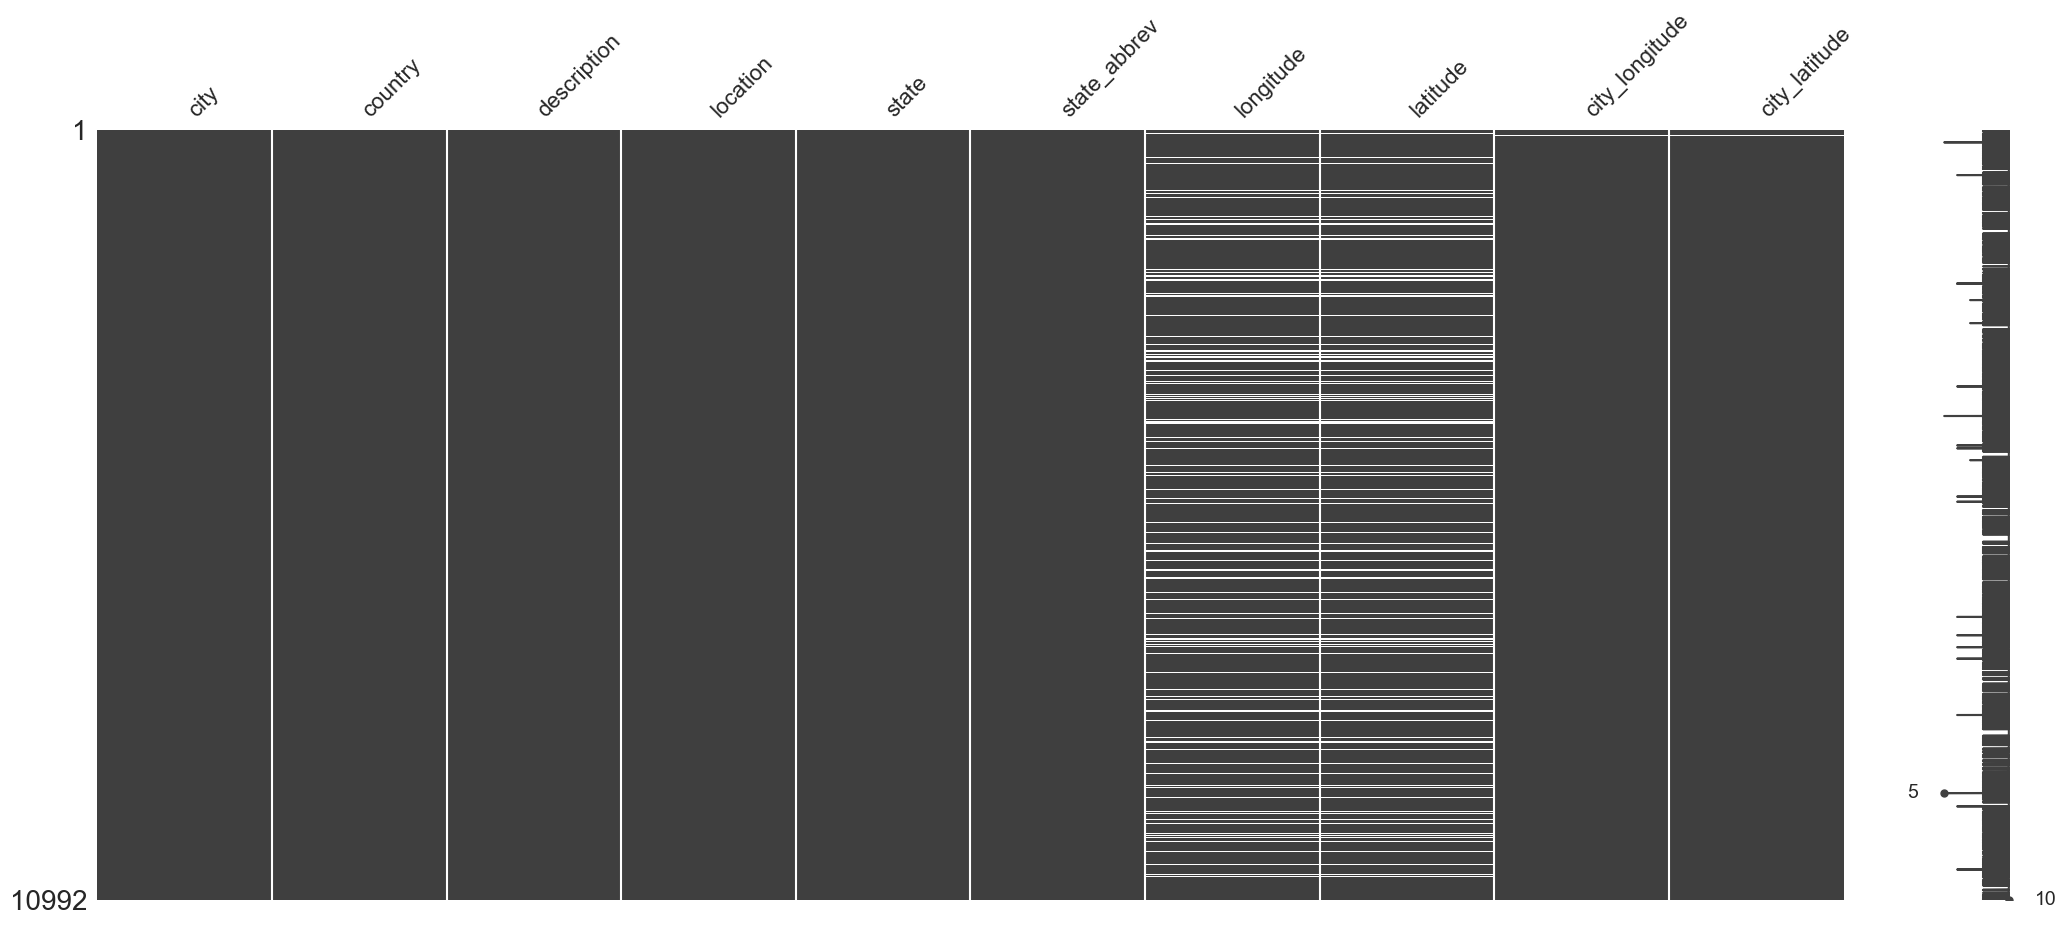

In [34]:
# Visualize missing values
import missingno as msno
msno.matrix(haunted_places)

**Analyzing missing values:**  
columns with missing values:
-  `city` and `location` are both missing 3 values each (or 0.027%).  
- `longitude` and `latitude` are both missing 1,261 values each (about 11%).  
- `city_longitude` and `city_latitude` are both missing 29 values each (about 0.264%).  

how we will handle these:
- Since `city` and `location` together make up less than 0.06% of data, we can go ahead and drop these.  
-  for `longitude` and `latitude`, we will check to see if there exists a corresponding `city_longitude` and `city_latitude` for each. If so, we will grab that value and fill with it. We can do the same but backwards for `city_longitude` and `city_latitude`. Whatever is left, we can drop.  

First we drop missing rows in `city` and `location`:

In [35]:
# Drop NA values from `city`
haunted_places.dropna(subset=['city'], inplace=True)

# Drop NA values from `location`
haunted_places.dropna(subset=['location'], inplace=True)

# Display updated missing values
haunted_places.isnull().sum()

city                 0
country              0
description          0
location             0
state                0
state_abbrev         0
longitude         1255
latitude          1255
city_longitude      26
city_latitude       26
dtype: int64

Now, let's try to fill as many `longitude` and `latitude` values as possible using lambda functions. 

In [36]:
# Iterate through `longitude` and check for missing values 
haunted_places['longitude'] = haunted_places.apply(
    # For each row in `city_longitude` which is filled, fill `longitude` with it, and leave alone otherwise
    lambda row: row['city_longitude'] if pd.isnull(row['longitude']) else row['longitude'],
    axis=1
)

# Iterate through `latitude` and check for missing values 
haunted_places['latitude'] = haunted_places.apply(
    # For each row in `city_latitude` which is filled, fill `latitude` with it, and leave alone otherwise
    lambda row: row['city_latitude'] if pd.isnull(row['latitude']) else row['latitude'],
    axis=1
)

# print the new count on missing values
longitude_remaining = haunted_places['longitude'].isnull().sum()
print("There are " + str(longitude_remaining) + " nulls left in `longitude`.")
latitude_remaining = haunted_places['latitude'].isnull().sum()
print("There are " + str(latitude_remaining) + " nulls left in `latitude`.")

There are 15 nulls left in `longitude`.
There are 15 nulls left in `latitude`.


do the same with `city_longitude` and `city_latitude`.  

In [37]:
# Iterate through `city_longitude` and check for missing values 
haunted_places['city_longitude'] = haunted_places.apply(
    # For each row in `longitude` which is filled, fill `city_longitude` with it, and leave alone otherwise
    lambda row: row['longitude'] if pd.isnull(row['city_longitude']) else row['city_longitude'],
    axis=1
)

# Iterate through `city_latitude` and check for missing values 
haunted_places['city_latitude'] = haunted_places.apply(
    # For each row in `latitude` which is filled, fill `city_latitude` with it, and leave alone otherwise
    lambda row: row['latitude'] if pd.isnull(row['city_latitude']) else row['city_latitude'],
    axis=1
)

# print the new count on missing values
city_longitude_remaining = haunted_places['city_longitude'].isnull().sum()
print("There are " + str(city_longitude_remaining) + " nulls left in `city_longitude`.")
city_latitude_remaining = haunted_places['city_latitude'].isnull().sum()
print("There are " + str(city_latitude_remaining) + " nulls left in `city_latitude`.")

There are 15 nulls left in `city_longitude`.
There are 15 nulls left in `city_latitude`.


Both `longitude` and `latitude`, as well as `city_longitude` and `city_latitude` have 15 values left. Let's check them to be sure they are all the same:  

In [38]:
haunted_places[haunted_places['longitude'].isnull()]

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
643,Darktown,United States,"Reports of trolls, Hellhounds, human forms, ac...","""THE ALAMO""",Pennsylvania,PA,NaN,NaN,NaN,NaN
2188,Saddle Community,United States,Old timers tell of a haunting on 9 Mile Ridge ...,9 Mile Ridge,Arkansas,AR,NaN,NaN,NaN,NaN
2196,Tazlina,United States,The Tazlina Lodge is not in use anymore. Long ...,Tazlina Lodge,Arkansas,AR,NaN,NaN,NaN,NaN
3660,Fort Defiance,United States,The school gym is haunted by several children ...,Tse Ho Tso Middle School,Alabama,AL,NaN,NaN,NaN,NaN
4501,Akra/Leroy,United States,it's to be said that a lady has been seen with...,Road between Akra and Leroy,North Dakota,ND,NaN,NaN,NaN,NaN
4543,Mandan outskirts,United States,The spirit of the wives of the soldiers who we...,Custer House boardwalk,North Dakota,ND,NaN,NaN,NaN,NaN
5232,Diphtheria Hill,United States,An old cemetery on a hill near Clay Center whe...,Clay Center,Kansas,KS,NaN,NaN,NaN,NaN
5306,Rural Niotaze,United States,El Cado Cemetery - Witnesses claim to have see...,The Sandhills,Kansas,KS,NaN,NaN,NaN,NaN
6950,Harpo Studios,United States,Was the sight of a makeshift morgue after the ...,formerly the Chicago armory,Illinois,IL,NaN,NaN,NaN,NaN
7211,Reedsville,United States,Well as it is told if you go to the bridge and...,Dick Huffman bridge,Indiana,IN,NaN,NaN,NaN,NaN


The dataframe shows that there are NaNs for all four columns in question, meaning that these remaining 15 values can now be dropped, now that we know there is no latitude/longitude available to fill in either direction.  

In [39]:
# Drop NA values from longitude
haunted_places.dropna(subset=['longitude'], inplace=True)

# Display updated missing values
haunted_places.isnull().sum()

city              0
country           0
description       0
location          0
state             0
state_abbrev      0
longitude         0
latitude          0
city_longitude    0
city_latitude     0
dtype: int64

now that missing values have been handled, we'll check for duplicates. 


In [40]:
# Check for duplicate rows
duplicate_rows = haunted_places.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# Get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask_all = haunted_places.duplicated(keep=False)

# Use this mask to filter and display both the original and duplicate rows
duplicate_rows_all_df = haunted_places[duplicate_mask_all]
duplicate_rows_all_df

There are 2 duplicate row(s).



,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
1445,Chestnut Hill,United States,Students have reported lights along the pathwa...,Pine Manor College,Massachusetts,MA,-71.157477,42.319909,-71.166187,42.330380
1453,Chestnut Hill,United States,Students have reported lights along the pathwa...,Pine Manor College,Massachusetts,MA,-71.157477,42.319909,-71.166187,42.330380
6821,Fort Wayne,United States,It is believed that Carroll High School is cur...,Carroll High School,Indiana,IN,-85.192519,41.190347,-85.139351,41.079273
6824,Fort Wayne,United States,It is believed that Carroll High School is cur...,Carroll High School,Indiana,IN,-85.192519,41.190347,-85.139351,41.079273


There are 2 duplicates to remove.  

In [41]:
# Remove duplicate rows, if any
if duplicate_rows > 0: 
    haunted_places.drop_duplicates(inplace=True)

# Verify that the removal worked
duplicate_rows = haunted_places.duplicated().sum()
print("There are now " + str(duplicate_rows) + " duplicate row(s).\n")

There are now 0 duplicate row(s).



now let's determine if any data types need conversion.


In [42]:
# Display data types for each column
haunted_places.dtypes

city               object
country            object
description        object
location           object
state              object
state_abbrev       object
longitude         float64
latitude          float64
city_longitude    float64
city_latitude     float64
dtype: object

All data types look good. Next, let's do a quick check for outliers using box plots for each numerical column:

# Exploratory Data Analysis
*> again, note that unless specified otherwise, the following plots and comments are mostly for the Shadowlands data*.  

### 1. visualization: use multiple ways to look at both of client's dataset 
**Univariate**   
- countplot and map highlight of the top `state_abbrev`  
- countplot for the top `city`  
- map of `city`s with top n observations.  

**bivariate**  
- scatterplot map and heat map of `longitude` vs `latitude`   
- for the top few of `city`, a countplot of the top `location`s

**multivariate**    
- plot top `city` by their `city_longitude` and `city_latitude`  
- plot top `location`s by their `longitude` and `latitude`, for each top `city`

- heatmap of areas by "fear factor"   
- heatmap of areas by reliability  

### 2. natural language processing
**sentiment analysis using textblob**  
- "fear factor" metric: from polarity (closer to -1 is more fearful, towards 1 is less fearful)  
- "reliability" metric: from subjectivity (closer to 0 is less-reliable, towards 1 is more-reliable)

**word frequency analysis of textblob results**  
- conduct analysis of the most frequent words for subsets of the df - one for positive and one for negative sentiment. Compare the resulting most-frequent words and determine if the sentiment analysis was effective.  
- do the same for subjectivity.  

### 1. visualizations
**First, we can compare the client's data to the Shadowlands data by state**.  
countplot and corresponding map for the top `state_abbrev`:  
*> These figures depict the states with the highest frequencies of reports of haunted places.*  
*> If we are to prioritize the areas with greatest frequencies, these states are where we should focus our search efforts first.* 

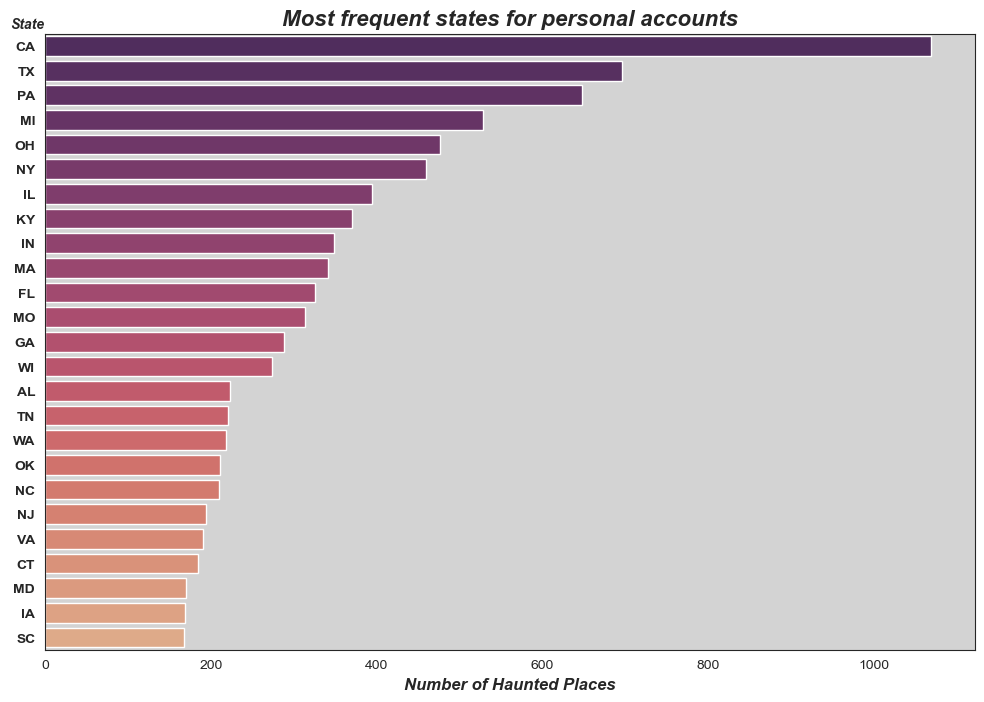

In [43]:
# plotting the top states for haunted places

# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

# Set up filter for states to be in descending order
states_order = haunted_places['state_abbrev'].value_counts().head(25).index

# establish the plot
sns.countplot(y="state_abbrev", data=haunted_places, palette="flare_r", order=states_order, ax=ax)

# set overall plot title
ax.set_title('Most frequent states for personal accounts', fontsize=16, weight='bold', style='italic', y=1)

# set x label
ax.set_xlabel('Number of Haunted Places', weight='bold', style='italic', size=12)

# set a custom y-axis label for `state`
ax.text(-0.001, 1.015, 'State', weight='bold', size=10, style='italic',
            verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)
# make default y-axis overall label disappear so it doesn't interfere with the custom y-axis label
ax.set_ylabel('')

# set background color
ax.set_facecolor('lightgrey')

# make y-axis label bold
for label in ax.get_yticklabels():
    label.set_weight('bold')

# show the plot
plt.show()


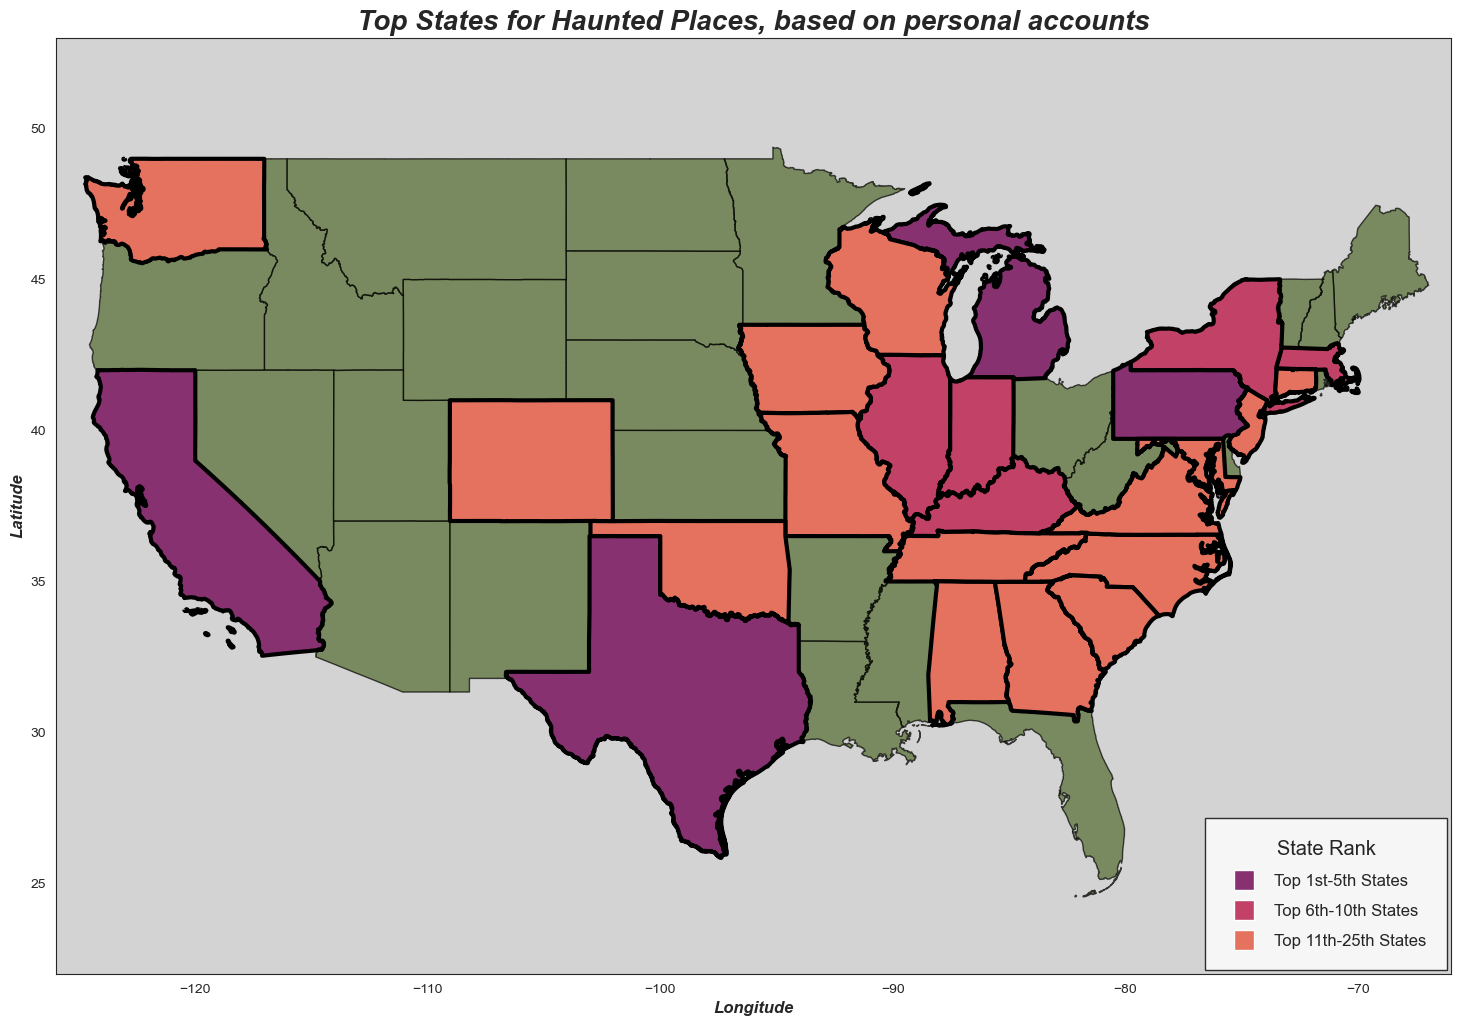

In [44]:
# mapping the top states for haunted places based on personal accounts 

# import necessary library for geographical data
import geopandas as gpd

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(18, 14))


# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', facecolor='darkolivegreen', alpha=0.7)  
# set up a custom color palette using "flare" in reverse order so darker colors indicate higher frequencies
palette = sns.color_palette("flare_r", 3)

# define colors for each "top" category
first_color = palette[0]
second_color = palette[1]
third_color = palette[2]

# highlight the top 5 most haunted states
top_five = haunted_places['state'].value_counts().head(4).index
highlight_gdf_top_five = states_gdf[states_gdf['NAME'].isin(top_five)]
highlight_gdf_top_five.boundary.plot(ax=ax, linewidth=3, color='black', facecolor=first_color)
# highlight for the top 6th-10th states
top_six_thru_ten = haunted_places['state'].value_counts().iloc[5:10].index
highlight_gdf_top_six_thru_ten = states_gdf[states_gdf['NAME'].isin(top_six_thru_ten)]
highlight_gdf_top_six_thru_ten.boundary.plot(ax=ax, linewidth=3, color='black', facecolor=second_color)
# highlight for the top 11th-25th states
top_eleven_thru_twentyfive = haunted_places['state'].value_counts().iloc[11:26].index
highlight_gdf_top_eleven_thru_twentyfive = states_gdf[states_gdf['NAME'].isin(top_eleven_thru_twentyfive)]
highlight_gdf_top_eleven_thru_twentyfive.boundary.plot(ax=ax, linewidth=3, color='black', facecolor=third_color)


# overall plot title
ax.set_title('Top States for Haunted Places, based on personal accounts', fontsize=20, weight='bold', style='italic')

# name labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

# add a custom legend
legend_labels=['Top 1st-5th States', 'Top 6th-10th States', 'Top 11th-25th States']
legend_colors=[first_color, second_color, third_color]
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=14, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, title='State Rank', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', loc='lower right')

# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)


ax.set_facecolor('lightgrey')

# change axis limits so the US is centeredd
ax.set_ylim(22, 53)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

Below, we can get an idea of which states are in which data set, and/or which are in both.  

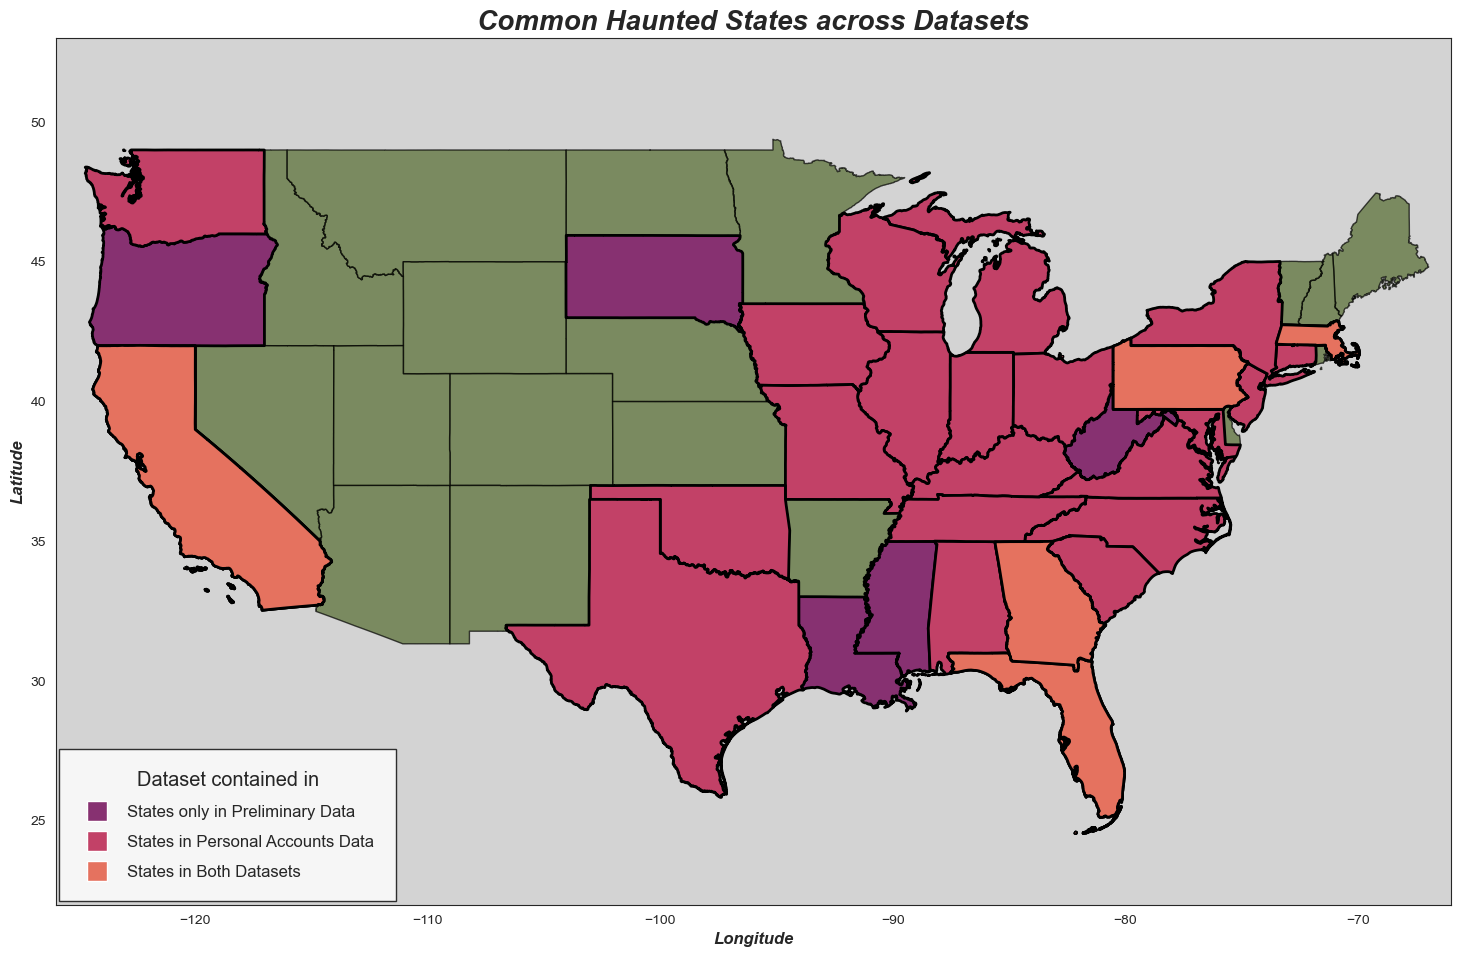

In [45]:
# mapping states across data sets 

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(18, 14))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', facecolor='darkolivegreen', alpha=0.7, zorder=1)  

# set up a custom color palette using "flare" in reverse order for consistency
palette = sns.color_palette("flare_r", 3)

# define colors for each category
first_color = palette[0]
second_color = palette[1]
third_color = palette[2]

# highlight for the`spooky` states from client's preliminary research
top_spooky = spooky['state_no_spaces'].value_counts().head(18).index
highlight_gdf_top_spooky = states_gdf[states_gdf['NAME'].isin(top_spooky)]
highlight_gdf_top_spooky.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=first_color, zorder=2)
# highlight for the top `haunted places` states
top_haunted = haunted_places['state'].value_counts().head(25).index
highlight_gdf_top_haunted = states_gdf[states_gdf['NAME'].isin(top_haunted)]
highlight_gdf_top_haunted.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=second_color, zorder=3)
# highlight for states in both the `spooky` and the top `haunted places` datasets
both = top_spooky.intersection(top_haunted)
highlight_gdf_both = states_gdf[states_gdf['NAME'].isin(both)]
highlight_gdf_both.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=third_color, zorder=4)

# overall plot title
ax.set_title('Common Haunted States across Datasets', fontsize=20, weight='bold', style='italic')

# axis customization
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

# add a custom legend
legend_labels=['States only in Preliminary Data', 'States in Personal Accounts Data', 'States in Both Datasets']
legend_colors=[first_color, second_color, third_color]
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=14, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, title='Dataset contained in', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', loc='lower left')

# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

# set a background color
ax.set_facecolor('lightgrey')

# change axis limits so the US is centered
ax.set_ylim(22, 53)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

countplot for the top of `city`:  
*> Of the cities contained in the personal accounts data, we can examine which ones are in the top for frequency*.  
*> Note: Remove Honolulu.*  
*> Further, if we are to choose by top "haunted places" cities, these are the ones we should focus on.*  

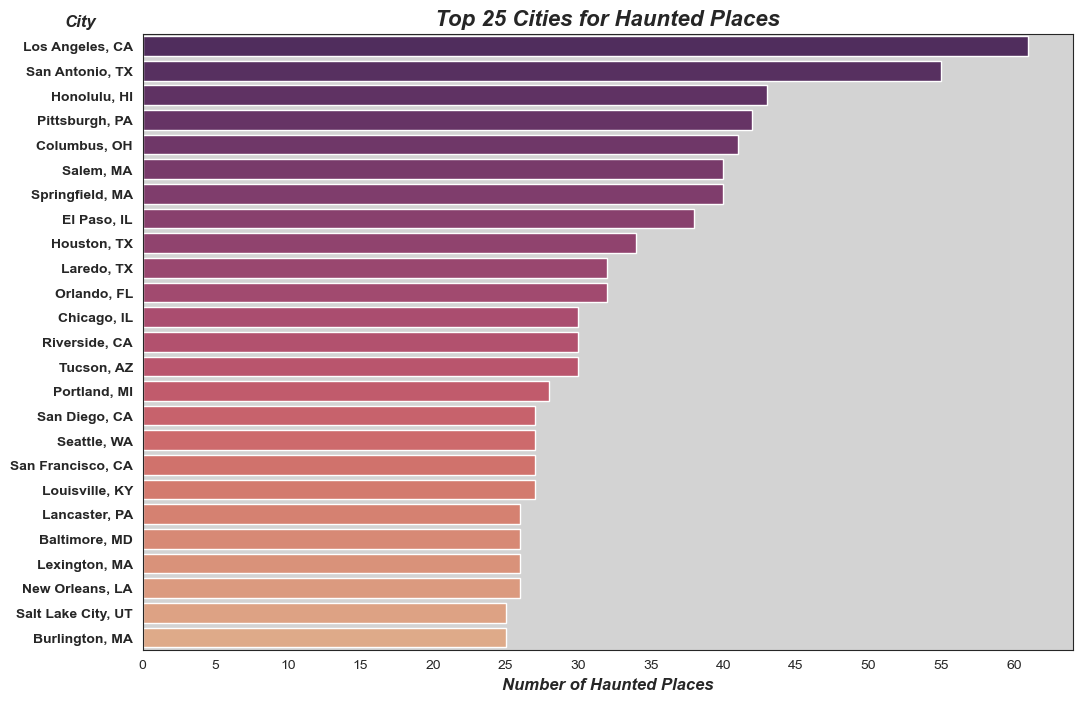

In [46]:
# plotting the top cities for haunted places

# set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.7, wspace=0.5)
sns.set_style('white')

# set up filter for cities to be in descending order
top_cities = haunted_places['city'].value_counts().head(25).index

# add state abbreviation to cities for the labels, so you know which state the more ambiguous ones are in
city_plus_state = haunted_places.drop_duplicates('city').set_index('city')['state_abbrev'].to_dict()

# establish the plot
sns.countplot(y="city", data=haunted_places, palette="flare_r", order=top_cities, ax=ax)

# give plot a title
ax.set_title('Top 25 Cities for Haunted Places', fontsize=16, weight='bold', style='italic', y=1)

# customize x-axis label
ax.set_xlabel('Number of Haunted Places', weight='bold', size=12, style='italic')

# update the x-axis tick labels to increment by 5
max_count = int(haunted_places['city'].value_counts().max())
xticks = list(range(0, max_count+1, 5)) 
ax.set_xticks(xticks)

# set a custom overall y-axis label for `city`
for label in ax.get_yticklabels():
    label.set_weight('bold')
ax.text(-0.05, 1.02, 'City', weight='bold', size=12, style='italic',
            verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)
# make default y-axis overall label disappear so it doesn't interfere with the custom y-axis label
ax.set_ylabel('', weight='bold')

# update y-axis tick labels to include state abbreviation
new_labels = [f"{city}, {city_plus_state.get(city, 'Unknown')}" for city in top_cities]
ax.set_yticklabels(new_labels)

# set a background color
ax.set_facecolor('lightgrey')

# show the plot
plt.show()

scatterplot map and heatmap of `longitude` vs `latitude`  
*> this shows points for all of the `haunted places` in the Shadowlands data.*  

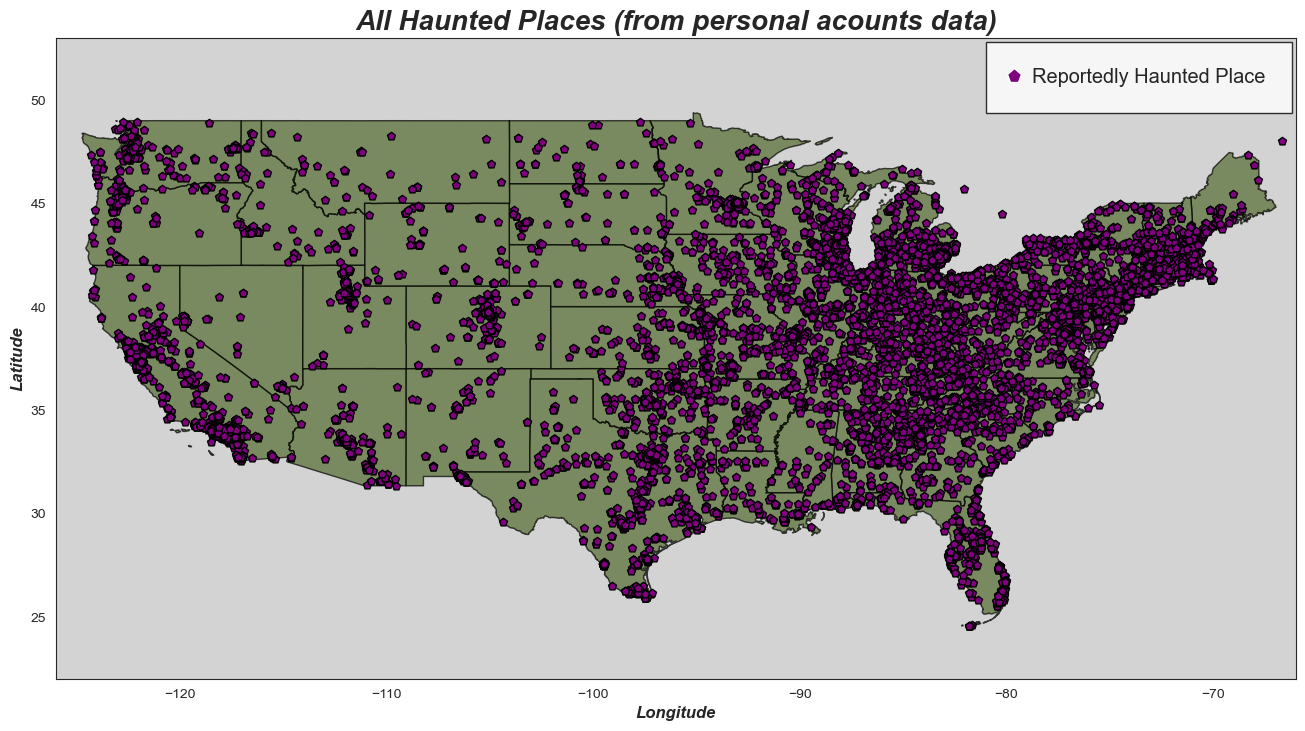

In [47]:
# plotting scatterplot heatmap for longitude vs latittude

# import necessary library for geographical data
from shapely.geometry import Point

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(haunted_places['longitude'], haunted_places['latitude'])]

# create the geodataframes
haunted_places_gdf = gpd.GeoDataFrame(haunted_places, geometry=geometry)

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# plot the state boundaries
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', zorder=1, facecolor='darkolivegreen', alpha=0.7)  

# plot the scatterplot
haunted_places_gdf.plot(ax=ax, color='purple', marker='p', edgecolor='black', zorder=2)

# give it an overall plot title
ax.set_title('All Haunted Places (from personal acounts data)', fontsize=20, weight='bold', style='italic')

# add a custom legend
legend_labels=['Reportedly Haunted Place']
legend_colors=['purple']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', handlelength=0.2)

# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

# edit the background color
ax.set_facecolor('lightgrey')

# customize x- and y-axis overall labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

# change axis limits so the US is centeredd
ax.set_ylim(22, 53)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

Scatterplot map for spooky data

Our client's preliminary research led them to the following 17 cities as being the "most haunted".  

In [48]:
# scatterplot version of the spooky data

# import necessary libraries 
from adjustText import adjust_text      # used to adjust the placement of city labels
import matplotlib.patches as patches    # used to put highlights under labels

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(spooky['Longitude'], spooky['Latitude'])]

# create the geodataframes
spooky_gdf = gpd.GeoDataFrame(spooky, geometry=geometry)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', zorder=1, facecolor='darkolivegreen', alpha=0.7)  

# plot the geodataframes
spooky_gdf.plot(ax=ax, color='darkorange', marker='p', markersize=90, edgecolor='black', zorder=2)

# Compile the top cities and their longitudes and latitudes (excluding Honolulu)
top_cities = haunted_places['city'].value_counts().head(25).index
top_cities_df = haunted_places[haunted_places['city'].isin(top_cities) & (haunted_places['city'] != 'Honolulu')]
geometry_cities = [Point(xy) for xy in zip(top_cities_df['city_longitude'], top_cities_df['city_latitude'])]
top_cities_gdf = gpd.GeoDataFrame(top_cities_df, geometry=geometry_cities)
# plot the top cities
top_cities_gdf.plot(ax=ax, color='purple', edgecolor='black', markersize=50, zorder=11)
# adds labels for cities
for x, y, label in zip(top_cities_df['city_longitude'], top_cities_df['city_latitude'], top_cities_df['city']):
    ax.text((x+0.2), (y+0.2), label, fontsize=12, color='purple', zorder=12)

# add a custom legend
legend_labels=['Spooky Place']
legend_colors=['darkorange']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', handlelength=0.2)
# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

# initialize the list to hold text for adjust_text
texts = []
# iterate over `City ` rows in `spooky` to capture city information to customize label placement
for index, row in spooky.iterrows():
    x = row['Longitude']
    y = row['Latitude']
    place = row['City '].strip()
    location = row['Location'].strip()
    
    # customize placement conditions for individual labels
    if (place == "Savannah") & (location == "Kehoe House"):
            ax.scatter(x, y, color='red', alpha=0, s=100)  # alpha=0 to make this point disappear, so Savannah is shown only once
            texts.append(ax.text(x, y, place, fontsize=14, weight='bold', ha='right', alpha=0))
    elif (place == "Savannah"):
        texts.append(ax.text((x+0.7), (y-0.2), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "Delray Beach"):
        texts.append(ax.text((x+0.3), (y-0.3), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "Estes Park"):
        texts.append(ax.text(x, (y+0.4), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Portland"):
        texts.append(ax.text((x+4), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))  
    elif (place == "Deadwood"):
        texts.append(ax.text((x-0.7), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Moundsville"):
        texts.append(ax.text((x+0.1), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Weston"):
        texts.append(ax.text((x-0.3), (y-0.3), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Washington"):
        texts.append(ax.text((x-1.9), (y-0.6), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Bedford"):
        texts.append(ax.text((x+1.4), (y+0.4), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Bethlehem"):
        texts.append(ax.text((x-0.8), (y+0.4), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Fall River"):
        texts.append(ax.text((x+0.2), (y+0.2), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "Philadelphia"):
        texts.append(ax.text((x-0.7), (y), place, fontsize=14, weight='bold', color='black', ha='right'))  
    elif (place == "New Orleans"):
        texts.append(ax.text((x+5.8), (y-0.3), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "St. Francisville"):
        texts.append(ax.text((x-0.3), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Long Beach"):
        texts.append(ax.text((x-0.3), (y-0.5), place, color='black', fontsize=14, weight='bold', ha='right'))
    elif (place == "Vicksburg"):
        texts.append(ax.text((x+0.1), (y+0.5), place, color='white', fontsize=14, weight='bold', ha='right'))


# Adjust overlapping text labels
adjust_text(texts, 
            ax=ax, 
            only_move={'points':'y', 'texts':'y'}, 
            expand_points=(1,1),# how much labels try to avoid points
            force_text=0.01,  #repulsion between texts
            force_points=0.1, #repulssion between points and texts
            lim=1
            )

# overall plot title
ax.set_title('AAA cities and Top cities from Shadowlands website (not ready)', fontsize=20, weight='bold', style='italic')

# set a background color
ax.set_facecolor('lightgrey')

# customize overall axis labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

# to make x and y tick label bolded
for label in ax.get_xticklabels():
    label.set_weight('bold')
for label in ax.get_yticklabels():
    label.set_weight('bold')

# change axis limits so the US is centered
ax.set_ylim(22, 53)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

ModuleNotFoundError: No module named 'adjustText'

Here are those cities overlayed with the the Shadowlands website data.  
*> It appears that most cities are shared, but we will look at this from several angles.*  

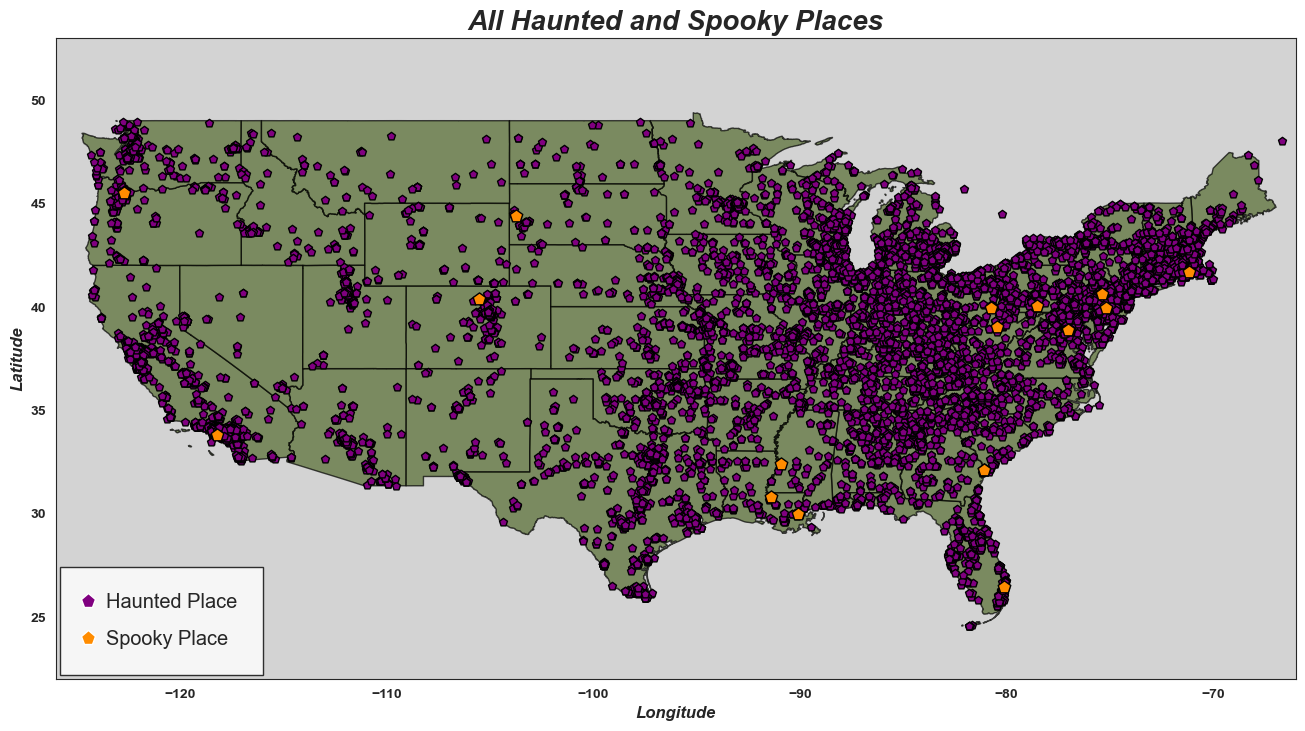

In [ ]:
# scatterplot version of the spooky data

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(spooky['Longitude'], spooky['Latitude'])]

# create the geodataframes
spooky_gdf = gpd.GeoDataFrame(spooky, geometry=geometry)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', zorder=1, facecolor='darkolivegreen', alpha=0.7)  

# plot the geodataframes
spooky_gdf.plot(ax=ax, color='darkorange', marker='p', markersize=90, edgecolor='black', zorder=3)

# plot the geodataframes
haunted_places_gdf.plot(ax=ax, color='purple', marker='p', edgecolor='black', zorder=2)

# overall plot title
ax.set_title('All Haunted and Spooky Places', fontsize=20, weight='bold', style='italic')

# add a custom legend
legend_labels=['Haunted Place', 'Spooky Place']
legend_colors=['purple', 'darkorange']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', handlelength=0.2)

# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

# edit the background color
ax.set_facecolor('lightgrey')

# name labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

for label in ax.get_xticklabels():
    label.set_weight('bold')

for label in ax.get_yticklabels():
    label.set_weight('bold')

# change axis limits so the US is centeredd
ax.set_ylim(22, 53)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

In [ ]:
# scatterplot version of the spooky data

# import necessary libraries 
from adjustText import adjust_text      # used to adjust the placement of city labels
import matplotlib.patches as patches    # used to put highlights under labels

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(spooky['Longitude'], spooky['Latitude'])]

# create the geodataframes
spooky_gdf = gpd.GeoDataFrame(spooky, geometry=geometry)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', zorder=1, facecolor='darkolivegreen', alpha=0.7)  

# plot the geodataframes
spooky_gdf.plot(ax=ax, color='darkorange', marker='p', markersize=90, edgecolor='black', zorder=2)

# add a custom legend
legend_labels=['Spooky Place']
legend_colors=['darkorange']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', handlelength=0.2)
# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

# initialize the list to hold text for adjust_text
texts = []
# iterate over `City ` rows in `spooky` to capture city information to customize label placement
for index, row in spooky.iterrows():
    x = row['Longitude']
    y = row['Latitude']
    place = row['City '].strip()
    location = row['Location'].strip()
    
    # customize placement conditions for individual labels
    if (place == "Savannah") & (location == "Kehoe House"):
            ax.scatter(x, y, color='red', alpha=0, s=100)  # alpha=0 to make this point disappear, so Savannah is shown only once
            texts.append(ax.text(x, y, place, fontsize=14, weight='bold', ha='right', alpha=0))
    elif (place == "Savannah"):
        texts.append(ax.text((x+0.7), (y-0.2), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "Delray Beach"):
        texts.append(ax.text((x+0.3), (y-0.3), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "Estes Park"):
        texts.append(ax.text(x, (y+0.4), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Portland"):
        texts.append(ax.text((x+4), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))  
    elif (place == "Deadwood"):
        texts.append(ax.text((x-0.7), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Moundsville"):
        texts.append(ax.text((x+0.1), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Weston"):
        texts.append(ax.text((x-0.3), (y-0.3), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Washington"):
        texts.append(ax.text((x-1.9), (y-0.6), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Bedford"):
        texts.append(ax.text((x+1.4), (y+0.4), place, fontsize=14, weight='bold', color='white', ha='right')) 
    elif (place == "Bethlehem"):
        texts.append(ax.text((x-0.8), (y+0.4), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Fall River"):
        texts.append(ax.text((x+0.2), (y+0.2), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "Philadelphia"):
        texts.append(ax.text((x-0.7), (y), place, fontsize=14, weight='bold', color='black', ha='right'))  
    elif (place == "New Orleans"):
        texts.append(ax.text((x+5.8), (y-0.3), place, fontsize=14, weight='bold', color='black', ha='right')) 
    elif (place == "St. Francisville"):
        texts.append(ax.text((x-0.3), (y+0.3), place, fontsize=14, weight='bold', color='white', ha='right'))
    elif (place == "Long Beach"):
        texts.append(ax.text((x-0.3), (y-0.5), place, color='black', fontsize=14, weight='bold', ha='right'))
    elif (place == "Vicksburg"):
        texts.append(ax.text((x+0.1), (y+0.5), place, color='white', fontsize=14, weight='bold', ha='right'))


# Adjust overlapping text labels
adjust_text(texts, 
            ax=ax, 
            only_move={'points':'y', 'texts':'y'}, 
            expand_points=(1,1),# how much labels try to avoid points
            force_text=0.01,  #repulsion between texts
            force_points=0.1, #repulssion between points and texts
            lim=1
            )

# overall plot title
ax.set_title('Most Haunted Cities from Preliminary Data', fontsize=20, weight='bold', style='italic')

# set a background color
ax.set_facecolor('lightgrey')

# customize overall axis labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

# to make x and y tick label bolded
for label in ax.get_xticklabels():
    label.set_weight('bold')
for label in ax.get_yticklabels():
    label.set_weight('bold')

# change axis limits so the US is centered
ax.set_ylim(22, 53)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_24040/368376179.py:10: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.1.
This will become an error in seaborn v0.13.0; please update your code.

  kde_plot = sns.kdeplot(x=spooky['Longitude'], y=spooky['Latitude'],
/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_24040/368376179.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde_plot = sns.kdeplot(x=spooky['Longitude'], y=spooky['Latitude'],


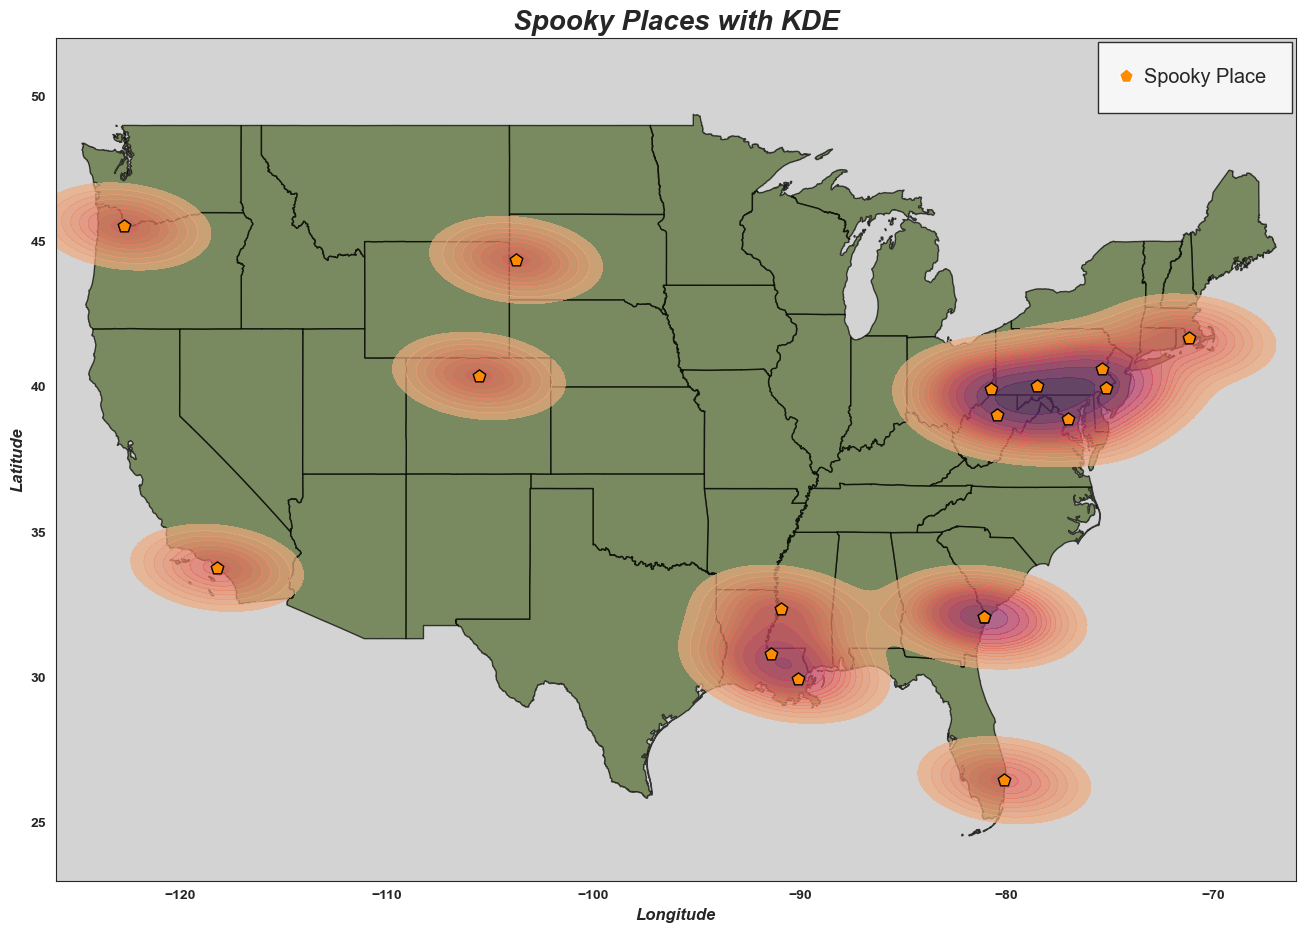

In [ ]:
# heat map version of the haunted places

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# plot the KDE heatmap
kde_plot = sns.kdeplot(x=spooky['Longitude'], y=spooky['Latitude'], 
            cmap="flare", shade=True, shade_lowest=False, ax=ax, levels=15, bw_method=0.15, thresh=0.1, alpha=0.7, zorder=2)

# plot the geodataframes
spooky_gdf.plot(ax=ax, color='darkorange', marker='p', markersize=90, edgecolor='black', zorder=3)

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', facecolor='darkolivegreen', alpha=0.7, zorder=1)  

# overall plot title
ax.set_title('Spooky Places with KDE', fontsize=20, weight='bold', style='italic')

# edit the background color
ax.set_facecolor('lightgrey')

# add a custom legend
legend_labels=['Spooky Place']
legend_colors=['darkorange']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', handlelength=0.2)
# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

# customize axis labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

# make tick marks bolded
for label in ax.get_xticklabels():
    label.set_weight('bold')
for label in ax.get_yticklabels():
    label.set_weight('bold')

# change axis limits so the US is centered
ax.set_ylim(23, 52)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

**Combo scatterplot and KDE plot**  
- Take the AAA article haunted locations and aggregate with the Haunted Places locations (find any common locations) and re-represent this plot with those common locations.  

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_24040/4285315218.py:28: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.17.
This will become an error in seaborn v0.13.0; please update your code.

  kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'],
/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_24040/4285315218.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'],


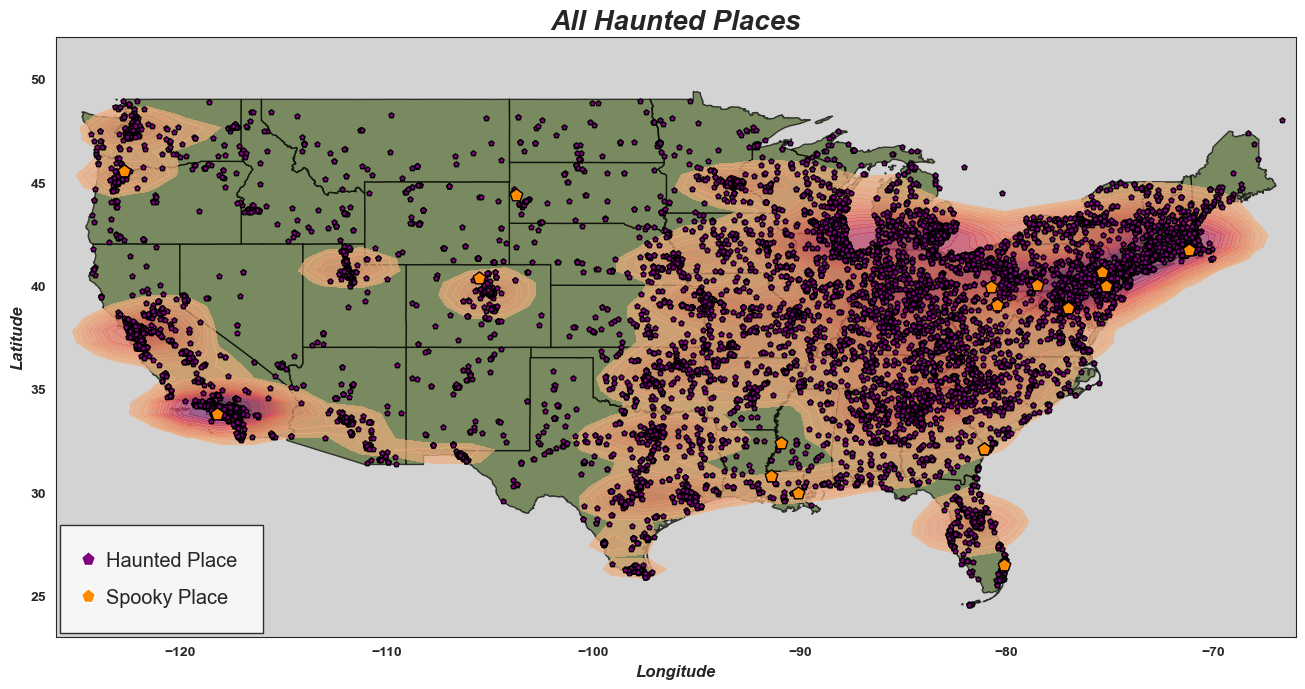

In [ ]:
# combo of scatterplot and KDE showing locations  of haunted places

# Import necessary library for geographical data
from shapely.geometry import Point

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(haunted_places['longitude'], haunted_places['latitude'])]

# create the geodataframes
haunted_places_gdf = gpd.GeoDataFrame(haunted_places, geometry=geometry)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', zorder=1, facecolor='darkolivegreen', alpha=0.7)  

# plot the geodataframes
haunted_places_gdf.plot(ax=ax, color='purple', marker='p', edgecolor='black', markersize=15, zorder=3)

# plot the geodataframes
spooky_gdf.plot(ax=ax, color='darkorange', marker='p', markersize=90, edgecolor='black', zorder=4)

# plot the KDE heatmap
kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'], 
            cmap="flare", shade=True, shade_lowest=False, ax=ax, levels=20, bw_method=0.1, alpha=0.7, thresh=0.17)


# overall plot title
ax.set_title('All Haunted Places', fontsize=20, weight='bold', style='italic')

# add a custom legend
legend_labels=['Haunted Place', 'Spooky Place']
legend_colors=['purple', 'darkorange']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', handlelength=0.2)

# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

ax.set_facecolor('lightgrey')

# name labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

for label in ax.get_xticklabels():
    label.set_weight('bold')

for label in ax.get_yticklabels():
    label.set_weight('bold')

# change axis limits so the US is centeredd
ax.set_ylim(23, 52)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_24040/2785196395.py:22: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.17.
This will become an error in seaborn v0.13.0; please update your code.

  kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'],
/var/folders/k8/29hfdmd56bs96xy1njxlppjc0000gn/T/ipykernel_24040/2785196395.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'],


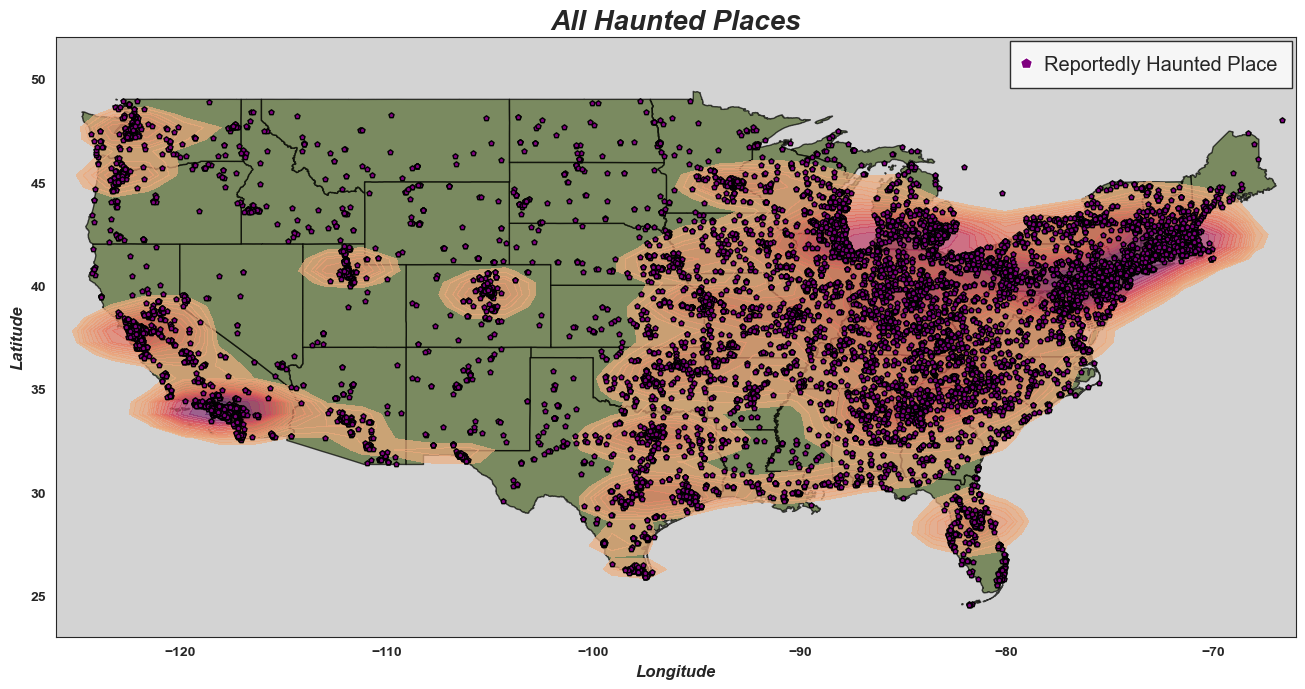

In [ ]:
# combo of scatterplot and KDE showing locations  of haunted places

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(haunted_places['longitude'], haunted_places['latitude'])]

# create the geodataframes
haunted_places_gdf = gpd.GeoDataFrame(haunted_places, geometry=geometry)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(16, 14))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', zorder=1, facecolor='darkolivegreen', alpha=0.7)  

# plot the geodataframes
haunted_places_gdf.plot(ax=ax, color='purple', marker='p', edgecolor='black', markersize=15, zorder=3)

# plot the KDE heatmap
kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'], 
            cmap="flare", shade=True, shade_lowest=False, ax=ax, levels=20, bw_method=0.1, alpha=0.7, thresh=0.17)


# overall plot title
ax.set_title('All Haunted Places', fontsize=20, weight='bold', style='italic')

# add a custom legend
legend_labels=['Reportedly Haunted Place']
legend_colors=['purple']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=9, markerfacecolor=color, linestyle='none') 
                  for label, color in zip(legend_labels, legend_colors)]
legend = ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.2, borderpad=0.4, facecolor='white', handlelength=0.2)

# more legend modifications
legend.get_frame().set_boxstyle("square")
legend.get_frame().set_edgecolor('black') 
legend.get_frame().set_linewidth(1)

ax.set_facecolor('lightgrey')

# name labels
ax.set_xlabel('Longitude', weight='bold', style='italic', size=12)
ax.set_ylabel('Latitude', weight='bold', style='italic', size=12)

for label in ax.get_xticklabels():
    label.set_weight('bold')

for label in ax.get_yticklabels():
    label.set_weight('bold')

# change axis limits so the US is centeredd
ax.set_ylim(23, 52)
ax.set_xlim(-126, -66)

# show the plot
plt.show()

for the top few of `city`, a countplot of the top `location`s
1. Los Angeles  
2. San Antonio  
3. 

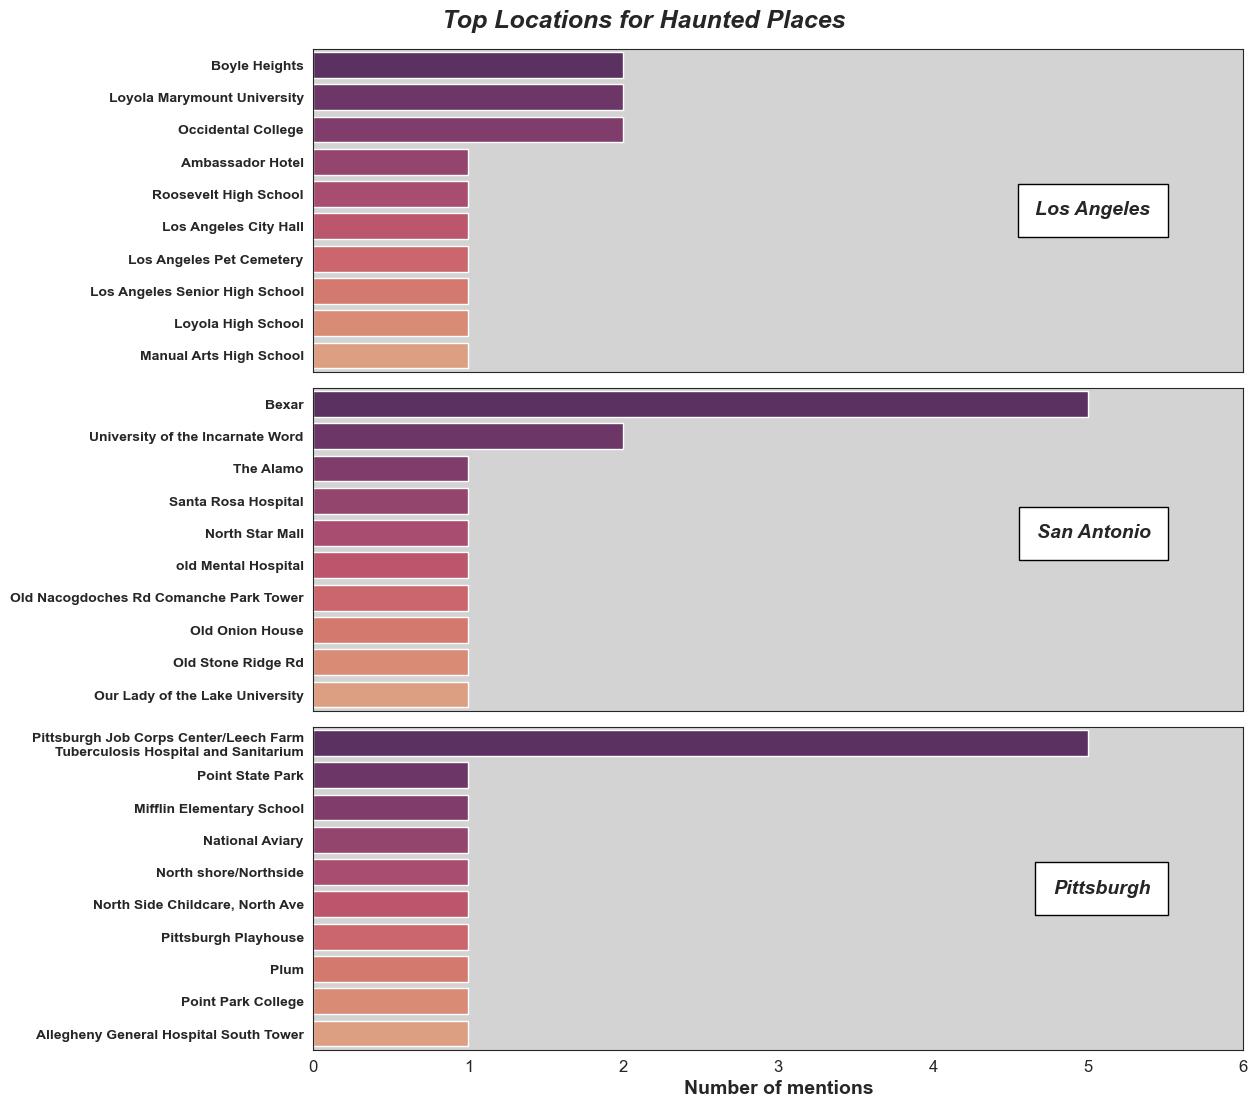

In [ ]:
# import necessary libraries 
import textwrap                         # for wrapping text of long location names
import matplotlib.ticker as ticker      # for forcing the x-axes to be integers (for some reason were decimal format)

# Filter `haunted_places` based on top cities
top_cities_df = haunted_places.query("city == 'Los Angeles'")
los_angeles_df = haunted_places.query("city == 'Los Angeles'")
san_antonio_df = haunted_places.query("city == 'San Antonio'")
pittsburgh_df = haunted_places.query("city == 'Pittsburgh'")

# Set up plot and styles
f, ax = plt.subplots(3, 1, figsize=(12, 13))
plt.subplots_adjust(hspace=0.05, wspace=0)
sns.set_style('white')


# Set up filter for each df for locations, making them in descending order
top_locations_los_angeles = los_angeles_df['location'].value_counts().head(10).index
top_locations_san_antonio = san_antonio_df['location'].value_counts().head(10).index
top_locations_pittsburgh = pittsburgh_df['location'].value_counts().head(10).index

# plotting for Los Angeles
sns.countplot(y="location", data=los_angeles_df, palette="flare_r", order=top_locations_los_angeles, ax=ax[0])
ax[0].set_xlabel('Number of mentions', weight='bold')
ax[0].set_ylabel('')
ax[0].text(0.9, 2.6, 'Los Angeles', weight='bold', size=14, style='italic',
            verticalalignment='center', horizontalalignment='right', transform=ax[2].transAxes,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.9'))
ax[0].set_xlim(0, 6)
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax[0].xaxis.set_visible(False)
ax[0].set_facecolor('lightgray')
for label in ax[0].get_yticklabels():
    label.set_weight('bold')

# plotting for San Antonio
sns.countplot(y="location", data=san_antonio_df, palette="flare_r", order=top_locations_san_antonio, ax=ax[1])
ax[1].set_xlabel('Number of mentions', weight='bold')
ax[1].set_ylabel('')
ax[1].text(0.9, 1.6, 'San Antonio', weight='bold', size=14, style='italic',
            verticalalignment='center', horizontalalignment='right', transform=ax[2].transAxes,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.9'))
ax[1].set_xlim(0, 6)
for label in ax[1].get_yticklabels():
    label.set_weight('bold')

# plotting for Pittsburgh
ax[1].xaxis.set_visible(False)
ax[1].set_facecolor('lightgray')

sns.countplot(y="location", data=pittsburgh_df, palette="flare_r", order=top_locations_pittsburgh, ax=ax[2])
ax[2].set_xlabel('Number of mentions', weight='bold', size=14)
ax[2].set_ylabel('')
ax[2].text(0.9, 0.5, 'Pittsburgh', weight='bold', size=14, style='italic',
            verticalalignment='center', horizontalalignment='right', transform=ax[2].transAxes,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.9'))
ax[2].set_xlim(0, 6)
ax[2].tick_params(axis='x', labelsize=12) 
ax[2].set_facecolor('lightgray')
for label in ax[2].get_yticklabels():
    label.set_weight('bold')

# Set the main title using suptitle
plt.gcf().suptitle('Top Locations for Haunted Places', fontsize=18, x=0.4, y=0.91, weight='bold', style='italic')


# Set the subtitle using set_title on the current axes
#plt.gca().set_title('Top 25 States, 2000s-2022', fontsize=12, weight='bold', style='italic', y=1)



# Wrap the y-tick labels
labels = [textwrap.fill(label.get_text(), 40) for label in ax[2].get_yticklabels()]
ax[2].set_yticklabels(labels)

# show the plot
plt.show()

plot top `location`s by their `longitude` and `latitude`, for each top `city`
1. Los Angeles

In [ ]:
# aggregate mentions for each `location` in Los Angeles
location_counts_los_angeles = los_angeles_df['location'].value_counts().reset_index()

# rename the columns
location_counts_los_angeles.columns = ['location', 'count']

# merge counts df with city df by location column. left-join ensures all of los angeles df is included
los_angeles_df = los_angeles_df.merge(location_counts_los_angeles, on='location', how='left')

# create filtered df by keeping only rows where location is in the top five
in_top_five_los_angeles = los_angeles_df[los_angeles_df['location'].isin(top_locations_los_angeles)]

# create another filtered df by keeping only rows where location is NOT in the top five
not_in_top_five_los_angeles = los_angeles_df[~los_angeles_df['location'].isin(top_locations_los_angeles)]

In [ ]:
# plotting interactive map of Los Angeles with haunted places
import folium

# create a base map centered around Los Angeles
m_los_angeles = folium.Map(
                    location=[34.05, -118.25],
                    zoom_start=10,
                    control_scale=True
                )

# add blue points to map for `location`s in top 5
for index, row in in_top_five_los_angeles.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip_text).add_to(m_los_angeles)

# add green points to map for `location`s NOT in top 5
for index, row in not_in_top_five_los_angeles.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    popup = folium.Popup(html=tooltip_text, max_width=300)
    folium.Marker([row['latitude'], row['longitude']],
                  popup=popup,
                  icon=folium.Icon(color="green")).add_to(m_los_angeles)

# aisplay the map
m_los_angeles

2. San Antonio

In [ ]:
# aggregate mentions for each `location` in San Antonio
location_counts = san_antonio_df['location'].value_counts().reset_index()

# rename the columns
location_counts.columns = ['location', 'count']

# merge counts df with city df by location column. left-join ensures all of san antonio df is included
san_antonio_df = san_antonio_df.merge(location_counts, on='location', how='left')

# create filtered df by keeping only rows where location is in the top five
in_top_five_san_antonio = san_antonio_df[san_antonio_df['location'].isin(top_locations_san_antonio)]

# create another filtered df by keeping only rows where location is NOT in the top five
not_in_top_five_san_antonio = san_antonio_df[~san_antonio_df['location'].isin(top_locations_san_antonio)]

In [ ]:
# plotting interactive map of San Antonio with haunted places

# Create a base map centered around San Antonio
m_san_antonio = folium.Map(
                    location=[29.42, -98.49],
                    zoom_start=10,
                    control_scale=True
                )

# add blue points to map for `location`s in top 5
for index, row in in_top_five_san_antonio.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip_text).add_to(m_san_antonio)

# add green points to map for `location`s NOT in top 5
for index, row in not_in_top_five_san_antonio.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']],
                  tooltip=tooltip_text,
                  icon=folium.Icon(color="green")).add_to(m_san_antonio)

# Display the map
m_san_antonio

3. Pittsburgh

In [ ]:
# aggregate mentions for each `location` in Pittsburgh
location_counts_pittsburgh = pittsburgh_df['location'].value_counts().reset_index()

# rename the columns
location_counts_pittsburgh.columns = ['location', 'count']

# merge counts df with city df by location column. left-join ensures all of pittsburgh df is included
pittsburgh_df = pittsburgh_df.merge(location_counts_pittsburgh, on='location', how='left')

# create filtered df by keeping only rows where location is in the top five
in_top_five_pittsburgh = pittsburgh_df[pittsburgh_df['location'].isin(top_locations_pittsburgh)]

# create another filtered df by keeping only rows where location is NOT in the top five
not_in_top_five_pittsburgh = pittsburgh_df[~pittsburgh_df['location'].isin(top_locations_pittsburgh)]

In [ ]:
# plotting interactive map of Pittsburgh with haunted places

# create base map centered around Pittsburgh
m_pittsburgh = folium.Map(
                    location=[40.4406, -79.9959],
                    zoom_start=10,
                    control_scale=True
                    )

# add blue points to map for `location`s in top 5
for index, row in in_top_five_pittsburgh.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip_text).add_to(m_pittsburgh)

# add green points to map for `location`s NOT in top 5
for index, row in not_in_top_five_pittsburgh.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']],
                  tooltip=tooltip_text,
                  icon=folium.Icon(color="green")).add_to(m_pittsburgh)

# display the map
m_pittsburgh

### Natural language processing  
*> only if time/if this fits in*  
**Sentiment analysis** using TextBlob  
- a score for "polarity"  (between -1 and 1). The closer to -1, the more negative the sentiment; the closer to 1, the more positive the sentiment, with neutral at 0.  
- a score for "subjectivity" (between 0 and 1). The closer to 0, the more objective the account; the closer to 1, the more subjective the sentiment, with 0.5 being more ambiguous.  

then, categorize these scores into categorical descriptors for easier interpretation.  
- "polarity" from Strongly Negative > Negative > Neutral > Positive > Strongly Positive  
- *> change to * ?   
- "subjectivity" from Very Low > Low > Medium > High > Very High  

then, briefly examine some of the most common words for the extreme ends of each category within each measure of sentiment.  
- we expect Strongly Negative "polarity" to contain more fearful rhetoric. Strongly Positive, should appear more lighthearted.  
- similarly, Very Low "subjectivity" should not contain a lot of "I" (and similar) words, while very High "subjectivity" should.   

finally, if results seem satisfactory, produce plots of these results and see how they match up to other areas.  
- "polarity" may shed some light into which areas are safer, and more tourist-friendly than others.  
- "subjectivity" may indicate which areas have more reliable accounts to their haunted-ness.  

In [ ]:
# import Textblob for sentiment analysis
from textblob import TextBlob

# define function which accepts text...
def analyze_sentiment(text):
    # ...then passes it into Texblob object for the analysis....
    analysis = TextBlob(text)
    # ...and then returns the polarity score and subjectivity score as a tuple
    return pd.Series([analysis.sentiment.polarity, analysis.sentiment.subjectivity], index=['polarity', 'subjectivity'])

# this applies the function to `description`
# it also splits the resulting tuple and returns each part into a separate column
haunted_places[['polarity', 'subjectivity']] = haunted_places['description'].apply(analyze_sentiment)

# show df to check results
haunted_places.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,polarity,subjectivity
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,-0.017105,0.420468
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,-0.067955,0.364545
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,0.028655,0.431746
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,0.095411,0.349827
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,0.000000,0.378571


In [ ]:
# defines function which accepts the subjectivity score as an argument...
def categorize_subjectivity(subjectivity):
    # ...then returns a categorical descriptor depending on the score  
    if subjectivity <= 0.2:
        return "Very Low"
    elif subjectivity <= 0.4:
        return "Low"
    elif subjectivity <= 0.6:
        return "Medium"
    elif subjectivity <= 0.8:
        return "High"
    else:
        return "Very High"

# defines function which accepts the polarity score as an argument...
def categorize_polarity(polarity):
    # ...then returns a categorical descriptor depending on the score 
    if polarity <= -0.6:
        return "Strongly Negative"
    elif polarity <= -0.2:
        return "Negative"
    elif polarity <= 0.2:
        return "Neutral"
    elif polarity <= 0.6:
        return "Positive"
    else:
        return "Strongly Positive"

# apply `categorize_polarity` to `polarity` and puts result in new column `polarity_level`
haunted_places['polarity_level'] = haunted_places['polarity'].apply(categorize_polarity)

# apply `categorize_subjectivity` to `subjectivity` and puts result in new column `subjectivity_level`
haunted_places['subjectivity_level'] = haunted_places['subjectivity'].apply(categorize_subjectivity)

# check to see that it worked
haunted_places.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,polarity,subjectivity,polarity_level,subjectivity_level
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,-0.017105,0.420468,Neutral,Medium
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,-0.067955,0.364545,Neutral,Low
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,0.028655,0.431746,Neutral,Medium
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,0.095411,0.349827,Neutral,Low
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,0.000000,0.378571,Neutral,Low


brief visualization of the results:   
- number of accounts by "polarity" level  
- number of accounts by "subjectivity" level  

ValueError: Could not interpret input 'Subjectivity_Level'

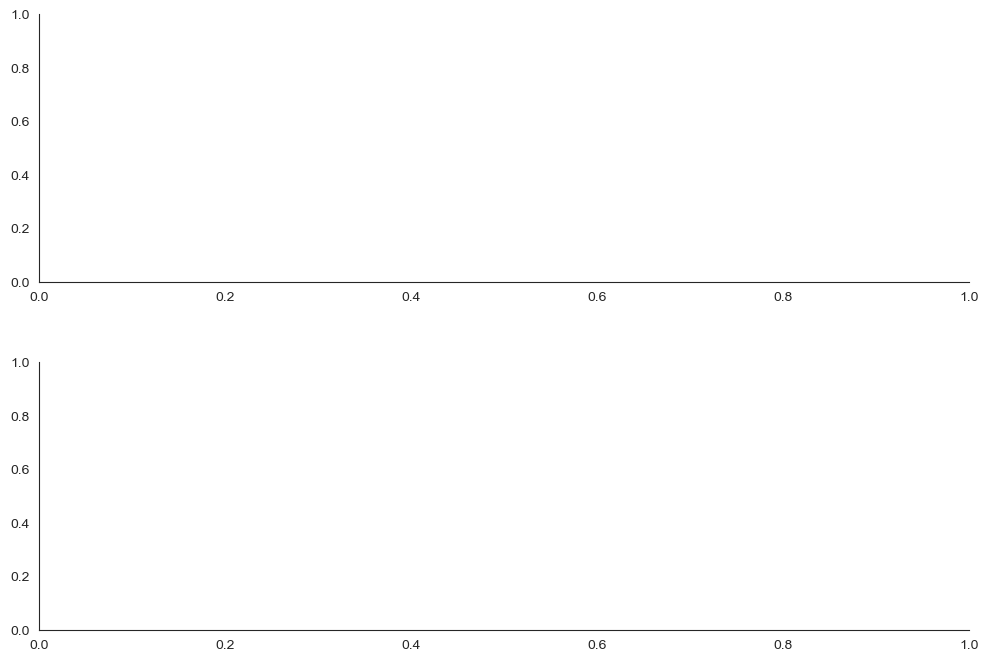

In [ ]:
# Set up plot and styles
f, ax = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

subjectivity_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
polarity_order = ['Strongly Negative', 'Negative', 'Neutral', 'Positive', 'Strongly Positive']

# establish the plots
sns.countplot(y="Subjectivity_Level", data=haunted_places, order=subjectivity_order, palette="flare_r", ax=ax[0])
ax[0].set_title('Subjectivity Level', fontsize=12, weight='bold', style='italic', y=1)
ax[0].set_xlabel('Number of mentions', weight='bold')
#ax[0].set_ylabel('Subjectivity Level', weight='bold')

sns.countplot(y="Polarity_Level", data=haunted_places, order=polarity_order, palette="flare_r", ax=ax[1])
ax[1].set_title('Polarity Level', fontsize=12, weight='bold', style='italic', y=1)
#ax[1].set_xlabel('Number of mentions', weight='bold')
#ax[1].set_ylabel('Polarity Level', weight='bold')


# show the plot
plt.show()

word frequency analysis

Mapping "polarity" 

In [ ]:
# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('../gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(20, 15))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# plot the KDE heatmap
kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'], hue=haunted_places['Subjectivity_Level'],
            palette="flare", shade=True, ax=ax, levels=15, bw_method=0.05, thresh=0.5)

# overall plot title
ax.set_title('Haunted Places', fontsize=20, weight='bold')

# add a custom legend
legend_labels=['Haunted Place']
legend_colors=['purple']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')


# change axis limits so the US is centeredd
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)

# show the plot
plt.show()

Mapping "subjectivity"

In [ ]:
# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(20, 15))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# plot the KDE heatmap
kde_plot = sns.kdeplot(x=haunted_places['longitude'], y=haunted_places['latitude'], hue=haunted_places['Subjectivity_Level'],
            palette="flare", shade=True, ax=ax, levels=15, bw_method=0.05, thresh=0.5)

# overall plot title
ax.set_title('Haunted Places', fontsize=20, weight='bold')

# add a custom legend
legend_labels=['Haunted Place']
legend_colors=['purple']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')


# change axis limits so the US is centeredd
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)

# show the plot
plt.show()

Final "summary" map includes:  
- 17 most-spooky cities from client's first data  
- top areas for tourism and general business environment  
- hotspots for the most-objective and most-positive sentiment  